api_key --> VEDI .env # https://aistudio.google.com/apikey

## Documentazione aistudio.google

#### https://ai.google.dev/gemini-api/docs/quickstart?hl=it&lang=python (generale)

In [3]:
!pip install -q -U google-generativeai

In [13]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.environ.get("GOOGLE_API_KEY")

genai.configure(api_key=API_KEY)
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")
print(response.text)

AI, or Artificial Intelligence, doesn't work in a single, monolithic way.  It's a broad field encompassing many different techniques and approaches, all aimed at creating systems that can perform tasks that typically require human intelligence.  However, most AI systems rely on some combination of these core concepts:

**1. Data:**  AI systems learn from data.  The more relevant and high-quality data they're trained on, the better they perform.  This data can be anything from images and text to sensor readings and financial transactions.

**2. Algorithms:** These are sets of rules and statistical techniques that allow the AI system to process and learn from the data.  Different algorithms are suited for different tasks.  Some common types include:

* **Machine Learning (ML):** This is a subset of AI where systems learn from data without explicit programming.  Instead of being explicitly programmed with rules, they identify patterns and relationships in the data to make predictions or d

#### https://ai.google.dev/gemini-api/docs/text-generation?hl=it&lang=python (generazione di testo)

In [6]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Write a story about a magic backpack.")
print(response.text)

Elara clutched the worn leather straps of the backpack, its faded floral pattern barely visible under layers of grime.  It wasn't just any backpack; it was Nana Elara's, a gift bestowed upon her on her tenth birthday, a gift whispered to hold more than just schoolbooks. Nana Elara, a whirlwind of eccentric charm and whispered secrets, had simply winked and said, "It's got a mind of its own, dearie.  Don't ask too many questions, just… trust it."

Elara, ever practical, had dismissed it as Nana Elara's whimsical way.  Until the first time she needed a pencil.  Her pencil case was empty.  She reached into the seemingly overflowing backpack, expecting nothing, and pulled out a perfectly sharpened graphite number 2.

Then came the day her best friend, Finn, fell out of a tree, scraping his knee badly.  Elara, panicked, rummaged through the backpack.  Out popped a small, exquisitely crafted first-aid kit, complete with antiseptic wipes, bandages, and a soothing balm that smelled of lavender

In [9]:
!pip install pillow

  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl (2.6 MB)


In [20]:
import PIL.Image

model = genai.GenerativeModel("gemini-pro-vision")
organ = PIL.Image.open("organo.jpg")
response = model.generate_content(["Tell me about this instrument", organ])
print(response.text)

TypeError: Could not create `Blob`, expected `Blob`, `dict` or an `Image` type(`PIL.Image.Image` or `IPython.display.Image`).
Got a: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Value: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x1AA11D60A50>

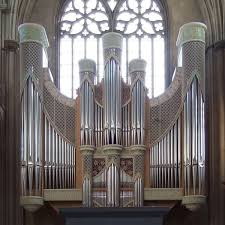

Errore durante l'interrogazione del modello: Could not create `Blob`, expected `Blob`, `dict` or an `Image` type(`PIL.Image.Image` or `IPython.display.Image`).
Got a: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Value: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x1AA0EF2E850>


In [21]:
import google.generativeai as genai
import os
from PIL import Image
from IPython.display import display, Image as IPImage # Per visualizzare l'immagine nel notebook

def identifica_strumento_musicale(api_key, image_path):
    """
    Interroga il modello Gemini per identificare uno strumento musicale in un'immagine JPEG.

    Args:
        api_key: La tua API key di Google Gemini.
        image_path: Il percorso globale all'immagine JPEG.

    Returns:
        Una stringa contenente la risposta del modello, oppure None in caso di errore.
    """
    try:
        # 1. Configura l'API con la tua chiave
        genai.configure(api_key=api_key)

        # 2. Carica il modello Gemini Vision
        model = genai.GenerativeModel("gemini-pro-vision")

        # 3. Verifica che il file immagine esista
        if not os.path.exists(image_path):
            print(f"Errore: il file immagine non esiste al percorso '{image_path}'")
            return None

        # 4. Carica l'immagine
        try:
            image = Image.open(image_path)
        except Exception as e:
           print(f"Errore durante il caricamento dell'immagine: {e}")
           return None
        
        # 5. Prepara il prompt con l'immagine
        prompt = "Quale strumento musicale è raffigurato in questa immagine?"
        response = model.generate_content([prompt, image])

        # 6. Restituisci la risposta del modello
        if response and response.text:
           return response.text
        else:
           return "Non è stato possibile ottenere una risposta dal modello."

    except Exception as e:
        print(f"Errore durante l'interrogazione del modello: {e}")
        return None


# Inserisci il percorso globale all'immagine JPEG
image_path = R"C:\Users\enduser\Desktop\PythonPostLaurea\zoppis\organo.jpg" 

# Visualizza l'immagine nel notebook
try:
    display(IPImage(filename=image_path))
except Exception as e:
    print(f"Errore durante la visualizzazione dell'immagine: {e}")


risultato = identifica_strumento_musicale(API_KEY, image_path)

if risultato:
  print("Risposta del modello:")
  print(risultato)

Dà problemi questa cosa...

### Google colab esempio

In [26]:
! pip install httpx

In [ ]:
from IPython.display import Markdown

In [28]:
from IPython.display import Markdown

In [30]:
image

<Response [200 OK]>

In [32]:
type(organ)

PIL.JpegImagePlugin.JpegImageFile

In [33]:
import base64
import httpx

# Retrieve an image
image_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg/2560px-Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg"
image = httpx.get(image_path)



# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Caption this image."
response = model.generate_content(
    [
        {
            "mime_type": "image/jpeg",
            "data": base64.b64encode(image.content).decode("utf-8"),
        },
        prompt,
    ]
)

Markdown(">" + response.text)

TypeError: a bytes-like object is required, not 'JpegImageFile'

In [35]:
import base64
import httpx
import pathlib

# Percorso dell'immagine locale
image_path = pathlib.Path(r"C:\Users\enduser\Desktop\PythonPostLaurea\zoppis\organo.jpg")

# Apri l'immagine
with open(image_path, "rb") as img_file:
    img_data = img_file.read()

# Codifica l'immagine in base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Caption this image."
response = model.generate_content(
    [
        {
            "mime_type": "image/jpeg",
            "data": img_base64,
        },
        prompt,
    ]
)

Markdown(">" + response.text)

>This image showcases the magnificent pipe organ within a church or cathedral.  The organ's facade, featuring gleaming metal pipes of varying lengths, is framed by an elegant arched window with intricate tracery.  The pipes are arranged symmetrically, rising to ornate peaks and flanked by decorative woodwork.  The architecture of both the organ and the window suggests a grand and traditional setting.  The lighting highlights the metallic sheen of the pipes and creates a sense of awe and reverence.


ANDATO!!!

In [36]:
import base64
import httpx
import pathlib

# Percorso dell'immagine locale
image_path = pathlib.Path(r"C:\Users\enduser\Desktop\PythonPostLaurea\zoppis\template_ordini_mail.png")

# Apri l'immagine
with open(image_path, "rb") as img_file:
    img_data = img_file.read()

# Codifica l'immagine in base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

# Choose a Gemini model
model = genai.GenerativeModel(model_name="gemini-1.5-pro")

# Create a prompt
prompt = "Fammi il parsing in italiano delle informazioni più importanti di questa immagine"
response = model.generate_content(
    [
        {
            "mime_type": "image/png",
            "data": img_base64,
        },
        prompt,
    ]
)

Markdown(">" + response.text)

>Ecco le informazioni più importanti dall'immagine, parsate in italiano:

* **Nuovo ordine online** effettuato il 13/12/2024 alle 14:20:38.
* **Numero d'ordine:** 2024_12_13#1421081*1428 (o 2001005703). Sembra ci siano due identificativi d'ordine.
* **Cliente:** SUNFLOWER SRL, VIA BORGO VICO 39, 22100 COMO (CO), Italia.
* **Contatto:** GIUSEPPE, Tel. 3936886595, Cell. 3936886595.
* **Pagamento:** Contrassegno.
* **Consegna:** Normale, con richiesta specifica di consegna per Martedì 17/12 insieme al resto dell'ordine.
* **Prodotti ordinati:**
    * 1 bottiglia di GIN KI NO BI KYOTO DRY GIN (0,70l) al prezzo di 40,95€.
* **Totale ordine (IVA inclusa):** 49,95€.  Sembra esserci una discrepanza tra il prezzo del singolo prodotto e il totale ordine. Potrebbero esserci costi di spedizione non dettagliati.
* **Stato dell'ordine:** Da preparare.


Da notare la presenza di alcuni caratteri speciali "§" che potrebbero indicare un problema di codifica del testo. Inoltre, l'ID ordine doppio e la discrepanza di prezzo meritano attenzione per verificare la correttezza dei dati.


In [38]:
sample_file_2 = PIL.Image.open('organo.jpg')
sample_file_3 = PIL.Image.open('template_ordini_mail.png')

In [39]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")

# Create a prompt.
prompt = "Descrivi le due immagini, hanno una qualche relazione tra di loro?"

response = model.generate_content([sample_file_2, sample_file_3, prompt])

Markdown(response.text)

TypeError: Could not create `Blob`, expected `Blob`, `dict` or an `Image` type(`PIL.Image.Image` or `IPython.display.Image`).
Got a: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Value: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x1AA14475450>

In [42]:
video_file_name = "GreatRedSpot.mp4"

print(f"Uploading file...")
video_file = genai.upload_file(path=video_file_name)
print(f"Completed upload: {video_file.uri}")

Uploading file...


SSLError: [SYS] unknown error (_ssl.c:2427)

### ChatGPT

In [1]:
!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)


In [2]:
import requests
import json

# Sostituisci con la tua chiave API
API_KEY = os.environ.get("GOOGLE_API_KEY")
# URL dell'endpoint
url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key={API_KEY}"

# Corpo della richiesta
payload = {
    "contents": [{
        "parts": [{"text": "Explain how AI works"}]
    }]
}

# Intestazioni della richiesta
headers = {
    "Content-Type": "application/json"
}

# Effettua la richiesta POST
response = requests.post(url, headers=headers, data=json.dumps(payload))

# Stampa la risposta
if response.status_code == 200:
    print("Risposta API:", response.json())
else:
    print("Errore:", response.status_code, response.text)


Risposta API: {'candidates': [{'content': {'parts': [{'text': 'AI works by mimicking human intelligence processes through machines, particularly computer systems.  It doesn\'t "think" like a human, but it can perform tasks that typically require human intelligence.  This is achieved through a combination of techniques, primarily:\n\n**1. Machine Learning (ML):** This is the core of most modern AI systems.  Instead of being explicitly programmed with rules, ML algorithms learn from data.  They identify patterns, make predictions, and improve their performance over time based on the data they\'re exposed to.  There are several types of ML:\n\n* **Supervised Learning:** The algorithm is trained on a labeled dataset (data with known inputs and outputs).  The algorithm learns to map inputs to outputs, and then uses this learned mapping to predict outputs for new, unseen inputs.  Examples include image classification (labeling images as cats or dogs) and spam detection.\n\n* **Unsupervised L

In [40]:
!wget https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
